In [1]:
import warnings
warnings.filterwarnings("ignore")
# 数据预处理
import pandas as pd

df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
# 缺失值处理
df.isnull().sum(axis = 0)
# 可以看到这边children，country，agent，company几列是有缺失值的

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
# 可以看一下缺失值的比例，若比例很小，直接将缺失值所在数据项删除就可以
df.info()
# 打印info可以看出来表中有超过十万条数据
# children，country只缺失了很少的一部分，直接删除这些缺失值所在的数据项即可

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df = df.dropna(subset=['children','country'])
df.isnull().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [5]:
# agent值直接用0来填充，可能这部分入住的客户并没有通过中介，用0作为标识即可
df['agent'].fillna(0, inplace=True)

In [6]:
# company值缺失的频率太高，可以考虑直接删除这一列不做分析
df.drop('company', axis=1, inplace =True)

In [7]:
# 数据质量检查
df.info()
# 现在打印一下处理好的数据信息
# 可以确定一下adr（日均价）是否存在异常值
# 可以确定一下入住人数是否为0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

{'whiskers': [<matplotlib.lines.Line2D at 0x1c592d6dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c592d86490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c592d6da30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c592d86b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c592d86e50>],
 'means': []}

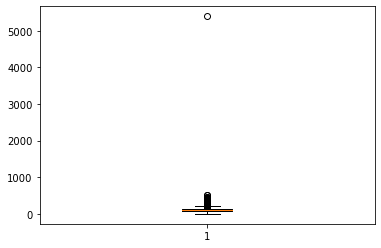

In [8]:
# 日均价格异常值检查
import matplotlib.pyplot as plt
plt.boxplot(df['adr'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c592e21130>,
 'caps': [<matplotlib.lines.Line2D at 0x1c592e217f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c592e12d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1c592e21eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c592e2b1f0>],
 'means': []}

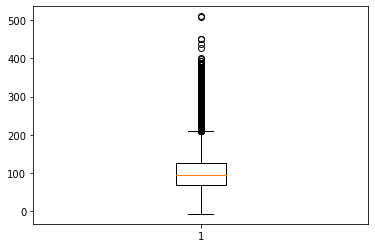

In [9]:
# 这里明显能看到一个大于5000的异常值
df.drop(df[df['adr']>5000].index, axis=0, inplace=True)
plt.boxplot(df['adr'])
# 删除异常值之后的箱型图中可以观察到，尽管箱型图的上须有较多的离群值，但偏离不大，可认为是正常值

In [10]:
# 入住人数异常值检查
df_clean = df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)]
len(df_clean)
# 这样的数据很少，只有170行，直接删除即可

170

In [11]:
df.drop(df_clean.index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118727 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118727 non-null  object 
 1   is_canceled                     118727 non-null  int64  
 2   lead_time                       118727 non-null  int64  
 3   arrival_date_year               118727 non-null  int64  
 4   arrival_date_month              118727 non-null  object 
 5   arrival_date_week_number        118727 non-null  int64  
 6   arrival_date_day_of_month       118727 non-null  int64  
 7   stays_in_weekend_nights         118727 non-null  int64  
 8   stays_in_week_nights            118727 non-null  int64  
 9   adults                          118727 non-null  int64  
 10  children                        118727 non-null  float64
 11  babies                          118727 non-null  int64  
 12  meal            

['Resort Hotel' 'City Hotel']


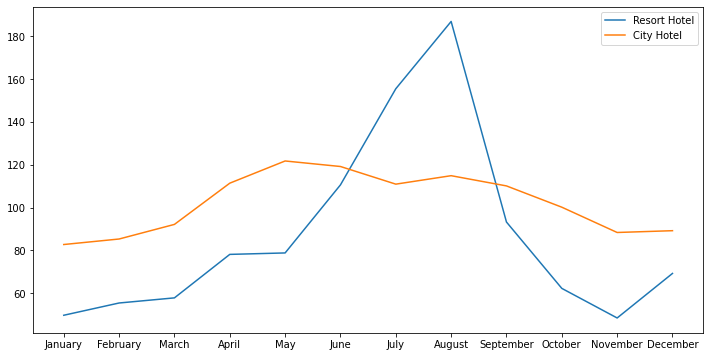

In [12]:
# EDA
# 日均价和月份的关系
import numpy as np
print(df['hotel'].unique())
y1 = df[df['hotel'] == 'Resort Hotel']['adr'].groupby(df['arrival_date_month']).mean()
y2 = df[df['hotel'] == 'City Hotel']['adr'].groupby(df['arrival_date_month']).mean()
x = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
order = dict(zip(x,range(len(x))))
y1 = pd.DataFrame(y1)
y2 = pd.DataFrame(y2)
y1['order'] = y1.index.map(order)
y2['order'] = y2.index.map(order)
y1.sort_values(by='order', ascending=True, inplace=True)
y2.sort_values(by='order', ascending=True, inplace=True)
plt.figure(figsize=(12,6))
plt.plot(x,y1['adr'], label='Resort Hotel')
plt.plot(x,y2['adr'], label='City Hotel')
plt.legend()
plt.show()
# 城市酒店价格波动不明显，度假酒店价格在暑期有明显峰值

(array([74590., 44137.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

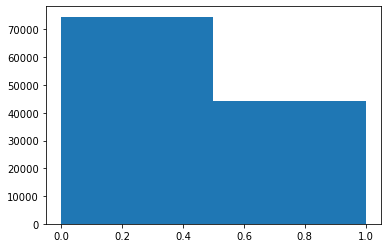

In [13]:
# 取消和未取消的客户数量对比
df['is_canceled'].value_counts()
plt.hist(df['is_canceled'], bins=2)

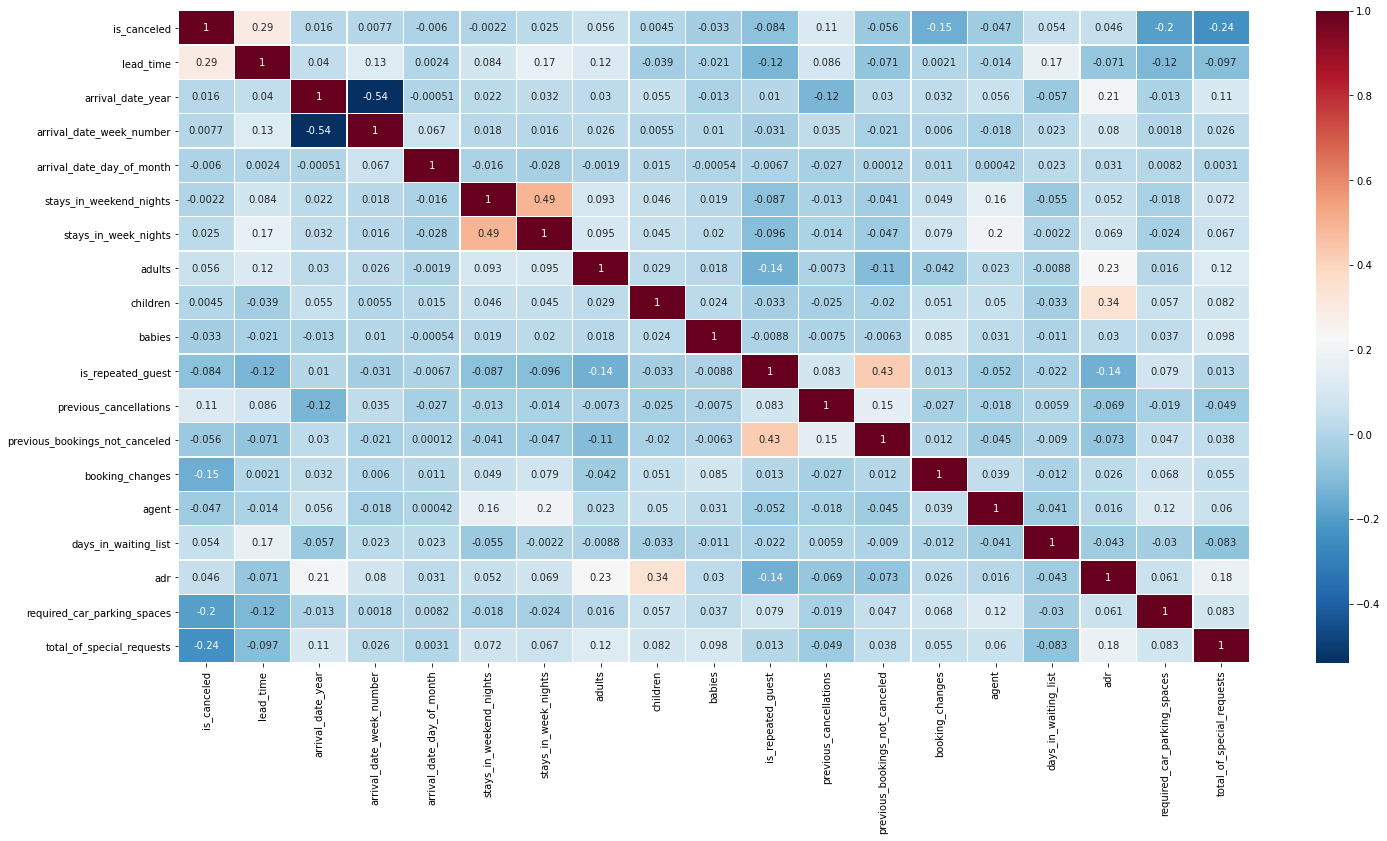

In [14]:
# 相关性判断
import seaborn as sns

plt.figure(figsize=(24,12))
corr = df.corr()
sns.heatmap(corr, cmap="RdBu_r", annot=True, linewidths=0.3)
plt.show()

In [15]:
corr_with_is_canceled = df.corr()['is_canceled'].abs().sort_values(ascending=False)
print(corr_with_is_canceled)
# 从热力图和下表可以看出，和目标变量is_canceled相关性较高的变量

is_canceled                       1.000000
lead_time                         0.291612
total_of_special_requests         0.235917
required_car_parking_spaces       0.195011
booking_changes                   0.145152
previous_cancellations            0.109911
is_repeated_guest                 0.084140
adults                            0.056128
previous_bookings_not_canceled    0.055502
days_in_waiting_list              0.054114
agent                             0.046853
adr                               0.045924
babies                            0.032605
stays_in_week_nights              0.024812
arrival_date_year                 0.016411
arrival_date_week_number          0.007676
arrival_date_day_of_month         0.006014
children                          0.004537
stays_in_weekend_nights           0.002212
Name: is_canceled, dtype: float64


In [16]:
# 删除相关系数较小的特征
del_col = corr_with_is_canceled[corr_with_is_canceled.values<0.1].index
df.drop(columns=del_col, axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July,BB,PRT,Direct,Direct,0,C,C,3,No Deposit,Transient,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,July,BB,PRT,Direct,Direct,0,C,C,4,No Deposit,Transient,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,July,BB,GBR,Direct,Direct,0,A,C,0,No Deposit,Transient,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,July,BB,GBR,Corporate,Corporate,0,A,A,0,No Deposit,Transient,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,July,BB,GBR,Online TA,TA/TO,0,A,A,0,No Deposit,Transient,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,BB,BEL,Offline TA/TO,TA/TO,0,A,A,0,No Deposit,Transient,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,August,BB,FRA,Online TA,TA/TO,0,E,E,0,No Deposit,Transient,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,August,BB,DEU,Online TA,TA/TO,0,D,D,0,No Deposit,Transient,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,August,BB,GBR,Online TA,TA/TO,0,A,A,0,No Deposit,Transient,0,0,Check-Out,2017-09-07


In [17]:
# 离散型变量的处理
# 先筛选出所有的Object类型特征（即离散型变量）
cat_cols = [col for col in df.columns if df[col].dtype=='O']
cat_df = df[cat_cols]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118727 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    118727 non-null  object
 1   arrival_date_month       118727 non-null  object
 2   meal                     118727 non-null  object
 3   country                  118727 non-null  object
 4   market_segment           118727 non-null  object
 5   distribution_channel     118727 non-null  object
 6   reserved_room_type       118727 non-null  object
 7   assigned_room_type       118727 non-null  object
 8   deposit_type             118727 non-null  object
 9   customer_type            118727 non-null  object
 10  reservation_status       118727 non-null  object
 11  reservation_status_date  118727 non-null  object
dtypes: object(12)
memory usage: 16.8+ MB


In [18]:
# reservation_status_date日期格式拆分
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['reservation_status_year'] = cat_df['reservation_status_date'].dt.year
cat_df['reservation_status_month'] = cat_df['reservation_status_date'].dt.month
cat_df['reservation_status_day'] = cat_df['reservation_status_date'].dt.day

In [19]:
cat_df.drop('reservation_status_date', axis=1, inplace=True)

In [20]:
# 建立离散值arrival_date_month的映射
x = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
order = dict(zip(x,range(1,len(x)+1)))
cat_df['arrival_date_month'] = cat_df['arrival_date_month'].map(order)

In [21]:
# 获取其他特征的字段值
encoder_cols = cat_df.select_dtypes(include='O').columns
encoder_cols
# for col in cat_df.select_dtypes(include='O'):
#     print(f"{col}:\n {cat_df[col].unique()}\n")

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')

In [22]:
# 用sklearn处理编码
from sklearn import preprocessing

for col in encoder_cols:
    enc=preprocessing.LabelEncoder()   #获取一个LabelEncoder
    enc=enc.fit(cat_df[col])  #训练LabelEncoder
    cat_df[col]=enc.transform(cat_df[col])
cat_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day
0,1,7,0,135,3,1,2,2,0,2,1,2015,7,1
1,1,7,0,135,3,1,2,2,0,2,1,2015,7,1
2,1,7,0,59,3,1,0,2,0,2,1,2015,7,2
3,1,7,0,59,2,0,0,0,0,2,1,2015,7,2
4,1,7,0,59,6,3,0,0,0,2,1,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,8,0,15,5,3,0,0,0,2,1,2017,9,6
119386,0,8,0,56,6,3,4,4,0,2,1,2017,9,7
119387,0,8,0,43,6,3,3,3,0,2,1,2017,9,7
119388,0,8,0,59,6,3,0,0,0,2,1,2017,9,7


In [23]:
num_cols = [col for col in df.columns if df[col].dtype!='O']
num_df = df[num_cols]
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118727 entries, 0 to 119389
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   is_canceled                  118727 non-null  int64
 1   lead_time                    118727 non-null  int64
 2   previous_cancellations       118727 non-null  int64
 3   booking_changes              118727 non-null  int64
 4   required_car_parking_spaces  118727 non-null  int64
 5   total_of_special_requests    118727 non-null  int64
dtypes: int64(6)
memory usage: 11.3 MB


In [24]:
from sklearn.model_selection import train_test_split
X=pd.concat([num_df, cat_df], axis=1)
y=df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# ML建模
# 选取KNN，RF，adaboost三种模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
clf_reprot_knn = classification_report(y_test, y_pred_knn)
print(clf_reprot_knn)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14957
           1       0.86      0.74      0.80      8789

    accuracy                           0.86     23746
   macro avg       0.86      0.84      0.85     23746
weighted avg       0.86      0.86      0.86     23746



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
clf_reprot_rf = classification_report(y_test, y_pred_rf)
print(clf_reprot_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14957
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     23746
   macro avg       1.00      1.00      1.00     23746
weighted avg       1.00      1.00      1.00     23746



In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

y_pred_ada = rf.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
clf_reprot_ada = classification_report(y_test, y_pred_ada)
print(clf_reprot_ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14957
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     23746
   macro avg       1.00      1.00      1.00     23746
weighted avg       1.00      1.00      1.00     23746

